In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Wordcloud

In [2]:
# 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd
raw_total = pd.read_excel('./Reference/week_04_1_crawling_jejudoMatJip.xlsx')
raw_total['tags'] #태그 열 불러오기

0     ['#제주도맛집', '#제주맛집', '#제주도횟집', '#제주시횟집', '#제주공항...
1     ['#제주도맛집', '#신제주맛집', '#연동맛집', '#제주공항맛집', '#제주도...
2     ['#제주도맛집', '#제주맛집', '#제주도횟집', '#제주시횟집', '#제주공항...
3     ['#제주도맛집', '#제주맛집', '#제주공항근처맛집', '#제주골프', '#제주...
4     ['#제주도맛집', '#제주맛집', '#제주도횟집', '#제주시횟집', '#제주공항...
5     ['#제주도맛집', '#제주맛집', '#제주도횟집', '#제주시횟집', '#제주공항...
6     ['#제주도맛집', '#제주맛집', '#제주공항근처맛집', '#제주골프', '#제주...
7     ['#제주도맛집', '#신제주맛집', '#연동맛집', '#제주공항맛집', '#제주도...
8     ['#제주분식', '#제주현지인맛집', '#제주맛집', '#제주도맛집', '#제주공...
9     ['#제주배달맛집', '#제주갈치', '#옥돔', '#제주옥돔', '#주문폭주', ...
10                                     ['#제주도맛집\u2063']
11    ['#서귀포맛집전복해물탕은', '#이어도전복해물전문점', '#서귀포해물탕', '#서...
12                       ['#연동회관', '#제주신상맛집', '#제주뭐먹지']
13                                           ['#모티프커피']
14    ['#육성가', '#제주도맛집', '#제주성산흑돼지맛집...', '#성산읍맛집', ...
15    ['#애월맛집.', '#제주맛집', '#애월맛집추천', '#제주애월맛집', '#애월...
16                                     ['#제주도맛집\u2063']
17    ['#제주도', '#제주도맛집', '#제주도여행', '#한라수목원', '#한

In [3]:
#해시태그 통합 저장
tags_total = [] # 빈 리스트 만들기 - 최종
for tags in raw_total['tags']: #로우 토탈 태그에서 사용
    tags_list = tags[2:-2].split("', '") #앞뒤 [' , '] 자르기
    for tag in tags_list: #각각의 행안의 원소들 하나씩
        tags_total.append(tag) #tags_total에 넣기 

tags_total[:10]

['#제주도맛집',
 '#제주맛집',
 '#제주도횟집',
 '#제주시횟집',
 '#제주공항근처횟집',
 '#제주시내횟집',
 '#용두암근처맛집',
 '#용두암맛집',
 '#제주횟집추천',
 '#제주도공항근처횟집']

## 해시태그 출연 빈도 집계


In [4]:
# 빈도수 집계하기(Counter)
from collections import Counter #리스트 내 빈도수 세주는 라이브러리
tag_counts = Counter(tags_total) #사용

#상위 50개 태그 살피기
tag_counts.most_common(50) #상위 50개 내림차순 정렬

[('#제주도맛집', 29),
 ('#제주맛집', 17),
 ('#제주공항맛집', 10),
 ('#제주도여행', 9),
 ('#제주도맛집\\u2063', 9),
 ('', 9),
 ('#제주도', 8),
 ('#제주시맛집', 8),
 ('#제주여행', 6),
 ('#협재맛집', 6),
 ('#제주시', 5),
 ('#서귀포맛집', 5),
 ('#서귀포', 5),
 ('#제주카페', 5),
 ('#제주도횟집', 4),
 ('#제주시횟집', 4),
 ('#제주공항근처횟집', 4),
 ('#제주시내횟집', 4),
 ('#용두암근처맛집', 4),
 ('#용두암맛집', 4),
 ('#제주횟집추천', 4),
 ('#제주도공항근처횟집', 4),
 ('#도두맛집', 4),
 ('#이호테우해변맛집', 4),
 ('#제주공항근처맛집', 4),
 ('#제주현지인맛집', 4),
 ('#애월', 4),
 ('#협재해수욕장맛집', 4),
 ('#애월해안도로', 4),
 ('#제주서쪽맛집', 4),
 ('#제주도여행코스', 4),
 ('#애월맛집', 4),
 ('#연동맛집', 3),
 ('#제주도공항근처맛집', 3),
 ('#노형동맛집', 3),
 ('#제주', 3),
 ('#제주도민맛집', 3),
 ('#애월맛집.', 3),
 ('#애월맛집추천', 3),
 ('#제주애월맛집', 3),
 ('#제주도스타그램', 3),
 ('#제주도민추천맛집', 3),
 ('#제주도현지인맛집', 3),
 ('#제주도카페추천', 3),
 ('#제주도카페', 3),
 ('#제주시가볼만한곳', 3),
 ('#제주도먹방', 3),
 ('#애월가볼만한곳', 3),
 ('#서귀포여행', 3),
 ('#곽지해수욕장맛집', 3)]

In [5]:
# 광고 제거
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔', '#팔로우환영', '팔로우미']

# #방법 1
# tag_total_selected = [] #새 리스트 만들기
# for tag in tags_total: # 해시태그 리스트 가져오기
#     if tag not in STOPWORDS: #불용어에 없으면
#         tag_total_selected.append(tag) #어펜드 시켜줘라

# 방법 2        
tag_total_selected = [item for item in tags_total if item not in STOPWORDS]
tag_total_selected
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주도맛집', 29),
 ('#제주맛집', 17),
 ('#제주공항맛집', 10),
 ('#제주도여행', 9),
 ('#제주도맛집\\u2063', 9),
 ('', 9),
 ('#제주시맛집', 8),
 ('#제주여행', 6),
 ('#협재맛집', 6),
 ('#제주시', 5),
 ('#서귀포맛집', 5),
 ('#서귀포', 5),
 ('#제주카페', 5),
 ('#제주도횟집', 4),
 ('#제주시횟집', 4),
 ('#제주공항근처횟집', 4),
 ('#제주시내횟집', 4),
 ('#용두암근처맛집', 4),
 ('#용두암맛집', 4),
 ('#제주횟집추천', 4),
 ('#제주도공항근처횟집', 4),
 ('#도두맛집', 4),
 ('#이호테우해변맛집', 4),
 ('#제주공항근처맛집', 4),
 ('#제주현지인맛집', 4),
 ('#애월', 4),
 ('#협재해수욕장맛집', 4),
 ('#애월해안도로', 4),
 ('#제주서쪽맛집', 4),
 ('#제주도여행코스', 4),
 ('#애월맛집', 4),
 ('#연동맛집', 3),
 ('#제주도공항근처맛집', 3),
 ('#노형동맛집', 3),
 ('#제주', 3),
 ('#제주도민맛집', 3),
 ('#애월맛집.', 3),
 ('#애월맛집추천', 3),
 ('#제주애월맛집', 3),
 ('#제주도스타그램', 3),
 ('#제주도민추천맛집', 3),
 ('#제주도현지인맛집', 3),
 ('#제주도카페추천', 3),
 ('#제주도카페', 3),
 ('#제주시가볼만한곳', 3),
 ('#제주도먹방', 3),
 ('#애월가볼만한곳', 3),
 ('#서귀포여행', 3),
 ('#곽지해수욕장맛집', 3),
 ('#협재해변', 3)]

### 막대차트로 해시태그 살펴보기


In [6]:
#기본 라이브러리, 환경설정(한글폰트)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [7]:
#데이터 준비 - 데이터프레임 만들기
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']
tag_counts_df

,tags,counts
0,#제주도맛집,29
1,#제주맛집,17
2,#제주공항맛집,10
3,#제주도여행,9
4,#제주도맛집\u2063,9
5,,9
6,#제주시맛집,8
7,#제주여행,6
8,#협재맛집,6
9,#제주시,5


<AxesSubplot:title={'center':'What are the most frequent hashtags???(Top 30)'}, xlabel='counts', ylabel='tags'>

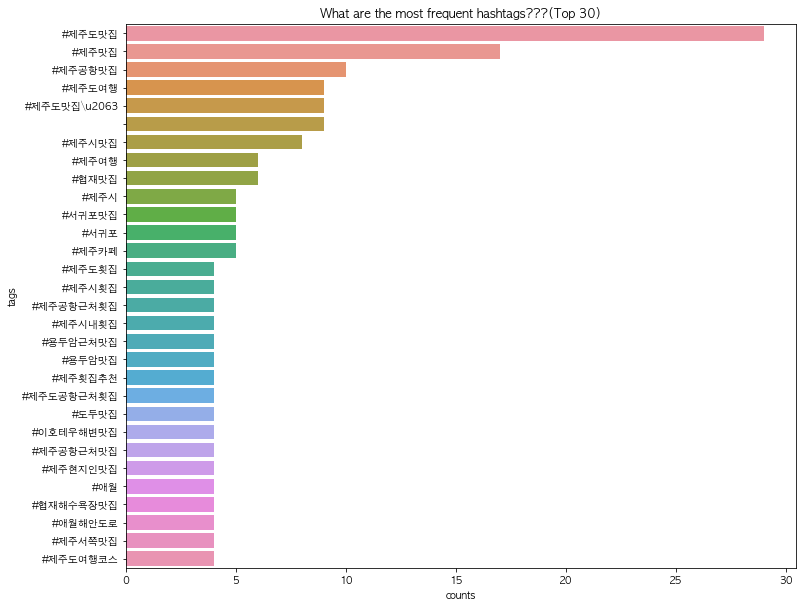

In [8]:
# 막대차트 그리기
plt.figure(figsize=(12,10)) 
plt.title('What are the most frequent hashtags???(Top 30)')
sns.barplot(x='counts', y='tags', data = tag_counts_df)

## 워드클라우드 그리기

In [9]:
#라이브러리
! pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud    # 에러시  ! pip install wordcloud 실행
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

(-0.5, 799.5, 399.5, -0.5)

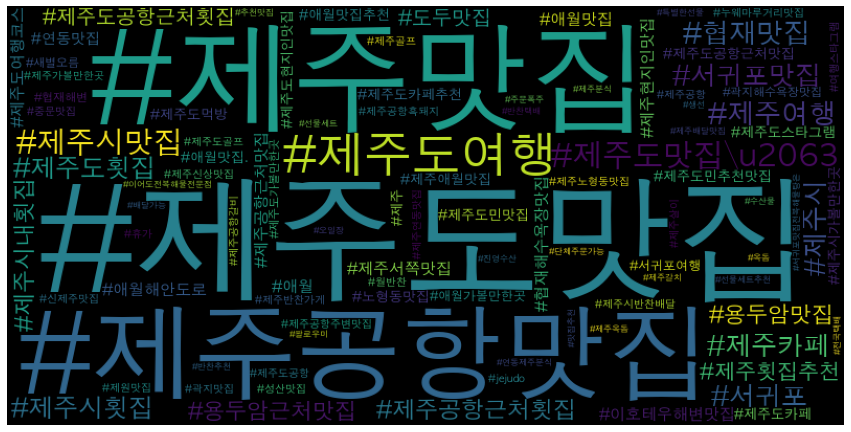

In [17]:
# 예제 5-23 워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="black",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
# plt.savefig('./files/2_tag-wordcloud.png')

(-0.5, 224.5, 224.5, -0.5)

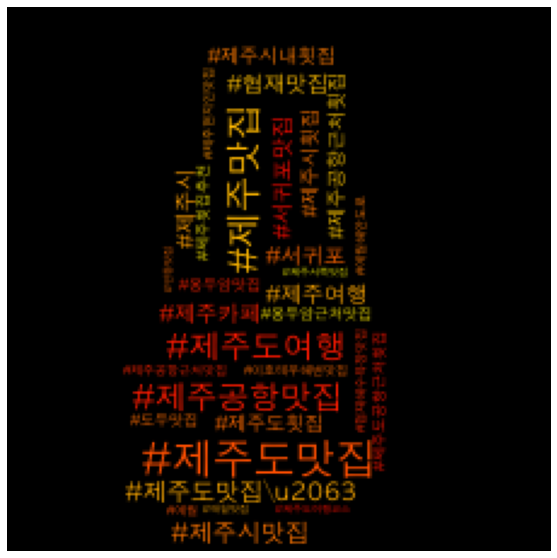

In [21]:
#그림 입혀보기
from PIL import Image
import numpy as np
mask = np.array(Image.open('./Reference/final.jpg')) #마스크 이미지 불러온뒤 numpy 어레이 형태로 전환

wordcloud=WordCloud(font_path= font_path, 
                    background_color="black",
                    colormap = 'autumn',
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400,
                    mask = mask #추가
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.axis('off')